In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

In [2]:
df = pd.read_csv('data_cleaned.csv')

In [3]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg_salary,company_txt,job_state,same_state,age,python,R,spark,aws,excel
0,Data Scientist,$216K-$234K (Glassdoor est.),"Secure our Nation, Ignite your Future\n\nSumma...",4.1,ManTech\n4.1,"Chantilly, VA","Herndon, VA",5001 to 10000 employees,1968,Company - Public,...,225.0,ManTech\n,VA,0,52,0,0,0,0,0
1,Data Scientist,$77K-$90K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,83.5,Affinity Solutions\n,NY,1,22,1,0,0,0,1
2,Data Scientist,$94K-$119K (Glassdoor est.),JOB CATEGORY:\n\nInformation Services\n\nREQUI...,3.9,Mars\n3.9,"Chicago, IL","Mc Lean, VA",10000+ employees,1911,Company - Private,...,106.5,Mars\n,IL,0,109,1,0,1,0,0
3,Data Scientist,$83K-$106K (Glassdoor est.),ESSENTIAL FUNCTIONSinclude the following. Othe...,3.6,Wings Financial CU\n3.6,"Apple Valley, MN","Saint Paul, MN",501 to 1000 employees,1939,Company - Private,...,94.5,Wings Financial CU\n,MN,0,81,1,0,0,0,1
4,Data Analytics Engineer,$46K-$78K (Glassdoor est.),Analytics Engineer-Administration\nSumma Healt...,3.8,Summa Health System\n3.8,"Akron, OH","Akron, OH",5001 to 10000 employees,1926,Nonprofit Organization,...,62.0,Summa Health System\n,OH,1,94,0,0,0,1,1


In [4]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'R', 'spark',
       'aws', 'excel'],
      dtype='object')

In [5]:
def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
            return 'senior'
    elif 'jr' in title.lower():
        return 'jr'
    else:
        return 'na'


# Job Title


In [6]:
df['job_simp'] = df['Job Title'].apply(title_simplifier)

In [7]:
df.job_simp.value_counts()

na                290
data scientist    244
data engineer     127
analyst           111
mle                38
manager            11
director            6
Name: job_simp, dtype: int64

# Job Seniority

In [8]:
df['seniority'] = df['Job Title'].apply(seniority)
df.seniority.value_counts()

na        523
senior    304
Name: seniority, dtype: int64

# Fix state Los Angeles 

In [9]:
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'toronto' else 'CA')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'richmond' else 'VA')
df.job_state.value_counts()

CA    195
MA     97
VA     87
NY     82
TX     38
WA     35
NC     29
IL     27
MD     24
FL     21
CO     21
PA     17
WI     17
OH     16
TN     15
NJ     12
MO     10
MN      9
GA      8
DC      7
IN      7
IA      6
AZ      6
SC      6
MI      5
NM      5
UT      4
KY      3
RI      3
LA      3
OK      3
AL      3
DE      2
OR      2
MT      1
ID      1
Name: job_state, dtype: int64

# Job description length 

In [10]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      3490
1      2728
2      3548
3      5295
4      4377
       ... 
822    4555
823    5002
824    4163
825    1791
826    4949
Name: desc_len, Length: 827, dtype: int64

# Competitor count

In [11]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [12]:
df['Competitors']

0                                                    -1
1                  Commerce Signals, Cardlytics, Yodlee
2                                                    -1
3                                                    -1
4                                                    -1
                             ...                       
822    Capgemini, Wipro, Cognizant Technology Solutions
823              American Express, Mastercard, Discover
824                                                  -1
825                                                  -1
826                                                  -1
Name: Competitors, Length: 827, dtype: object

# Hourly wage to annual 

In [13]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [14]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
589,1,46.0,80.0


# Remove '\n' from company_txt

In [15]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [16]:
df['company_txt']

0                           ManTech
1                Affinity Solutions
2                              Mars
3                Wings Financial CU
4               Summa Health System
                   ...             
822                           Ciber
823                       Visa Inc.
824                          h2o.ai
825                          Gensco
826    Riverside Research Institute
Name: company_txt, Length: 827, dtype: object

# Checking Data

In [17]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,python,R,spark,aws,excel,desc_len,num_comp
count,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000,827.000000
mean,3.742563,1887.609432,0.001209,0.002418,91.700121,122.811366,107.217654,0.556227,44.371221,0.538089,0.004837,0.229746,0.234583,0.525998,4015.319226,1.056832
std,0.672444,405.610628,0.034773,0.049147,44.505538,37.874883,36.597846,0.497129,45.639245,0.498849,0.069420,0.420924,0.423994,0.499626,1553.195127,1.378813
min,-1.000000,-1.000000,0.000000,0.000000,1.000000,27.000000,14.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,700.000000,0.000000
25%,3.400000,1947.000000,0.000000,0.000000,69.000000,97.000000,84.000000,0.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3002.500000,0.000000
50%,3.800000,1988.000000,0.000000,0.000000,90.000000,121.000000,106.500000,1.000000,26.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3788.000000,0.000000
75%,4.200000,2008.000000,0.000000,0.000000,110.500000,145.500000,128.500000,1.000000,62.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4825.500000,3.000000
max,5.000000,2020.000000,1.000000,1.000000,937.000000,271.000000,482.000000,1.000000,239.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13655.000000,3.000000


In [18]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

# Plots

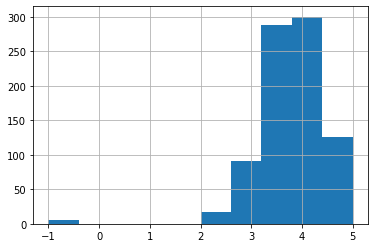

In [19]:
df.Rating.hist()

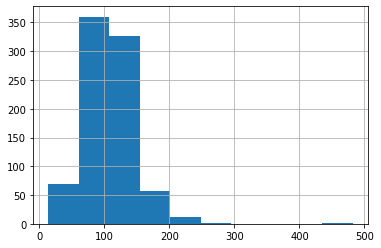

In [20]:
df.avg_salary.hist()

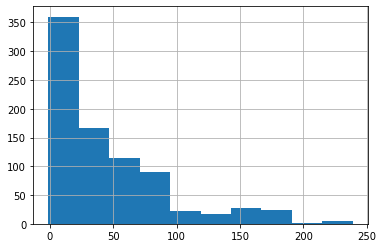

In [21]:
df.age.hist()

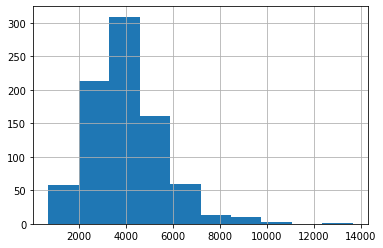

In [22]:
df.desc_len.hist()

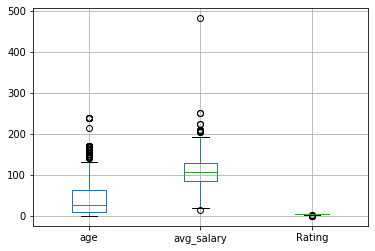

In [23]:
df.boxplot(column = ['age','avg_salary','Rating'])

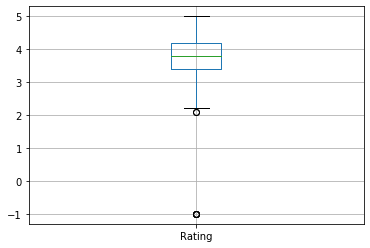

In [24]:
df.boxplot(column = 'Rating')

# Correlation

In [25]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,-0.090487,-0.073277,0.115595
avg_salary,-0.090487,1.000000,0.075568,0.105797
Rating,-0.073277,0.075568,1.000000,-0.117837
desc_len,0.115595,0.105797,-0.117837,1.000000


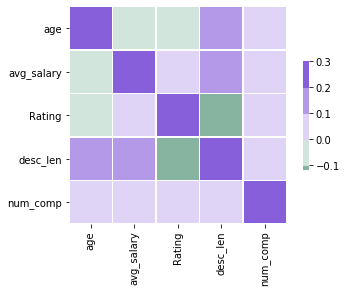

In [26]:
cmap = sns.diverging_palette(150, 275)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Plots

In [27]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python', 'R', 'spark',
       'aws', 'excel', 'job_simp', 'seniority', 'desc_len', 'num_comp'],
      dtype='object')

In [28]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state', 'python', 'R',
       'spark', 'aws', 'excel', 'job_simp', 'seniority']]

graph for Location: total = 196


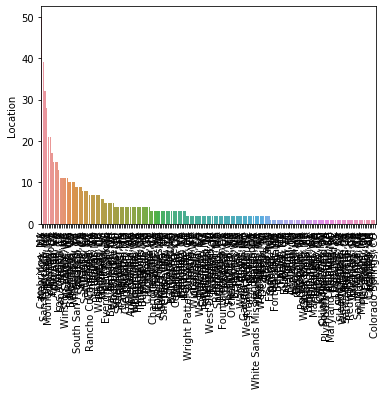

graph for Headquarters: total = 185


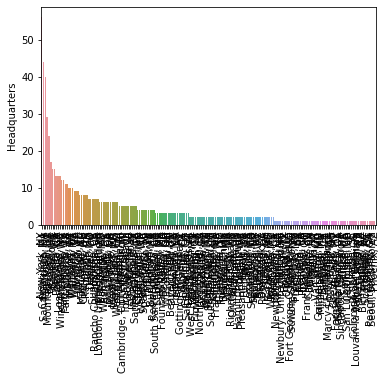

graph for Size: total = 9


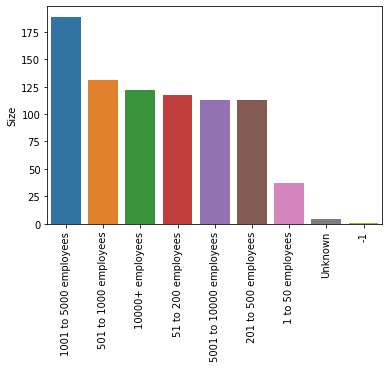

graph for Type of ownership: total = 11


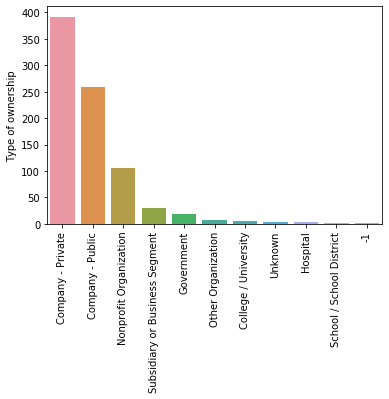

graph for Industry: total = 55


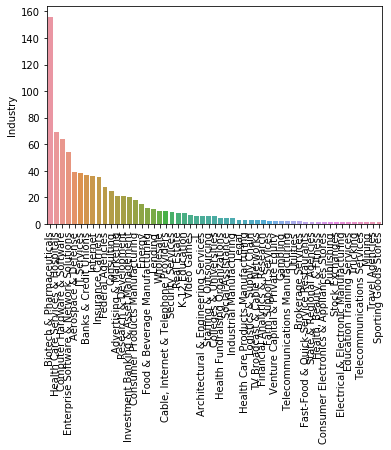

graph for Sector: total = 25


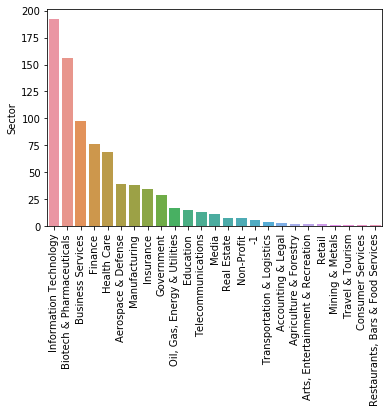

graph for Revenue: total = 13


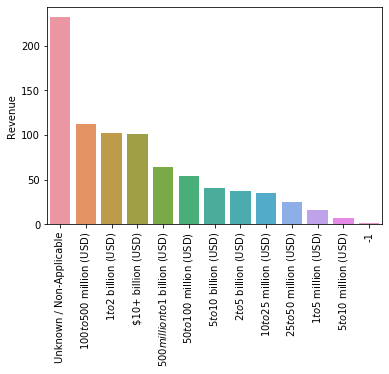

graph for company_txt: total = 342


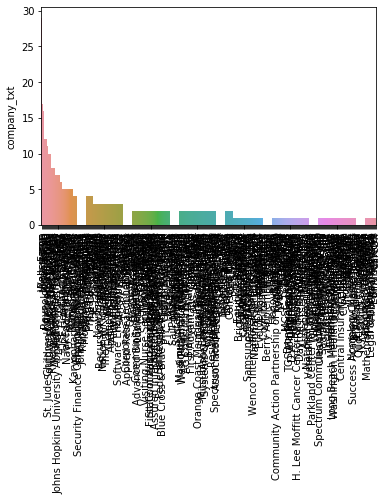

graph for job_state: total = 36


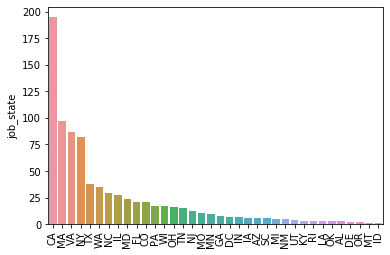

graph for same_state: total = 2


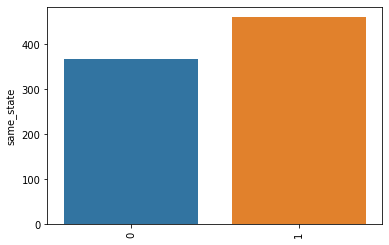

graph for python: total = 2


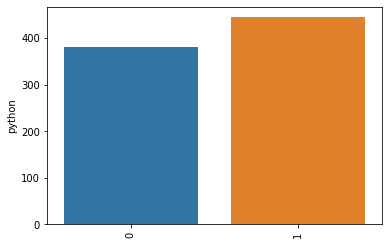

graph for R: total = 2


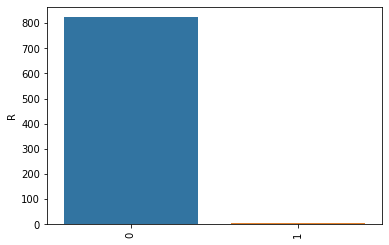

graph for spark: total = 2


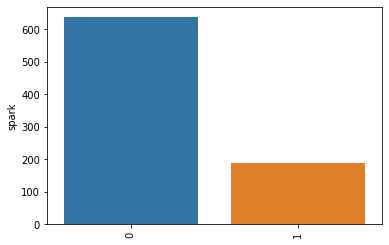

graph for aws: total = 2


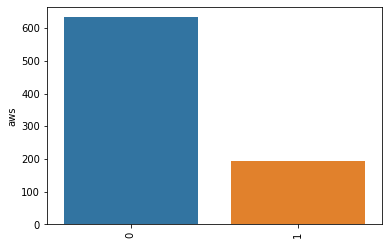

graph for excel: total = 2


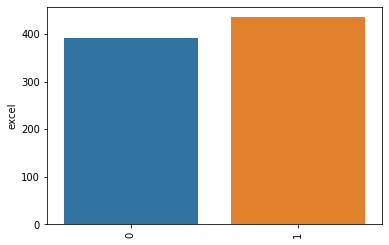

graph for job_simp: total = 7


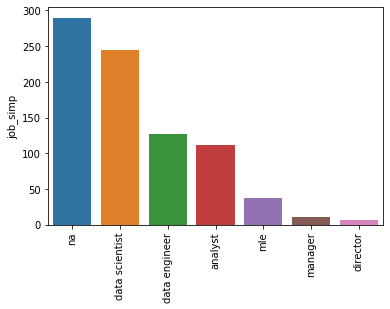

graph for seniority: total = 2


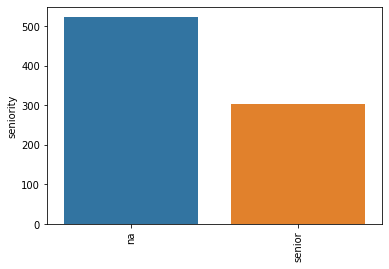

In [29]:
for i in df_cat.columns:
    cat_num = df_cat[i].value_counts()
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


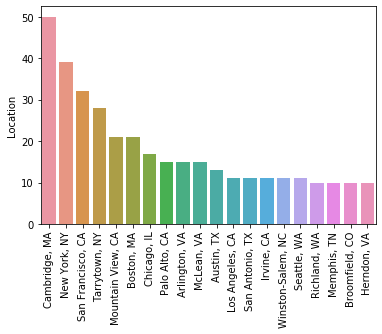

graph for Headquarters: total = 20


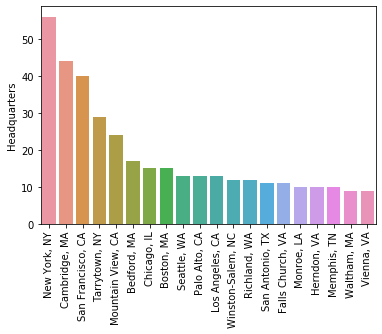

graph for company_txt: total = 20


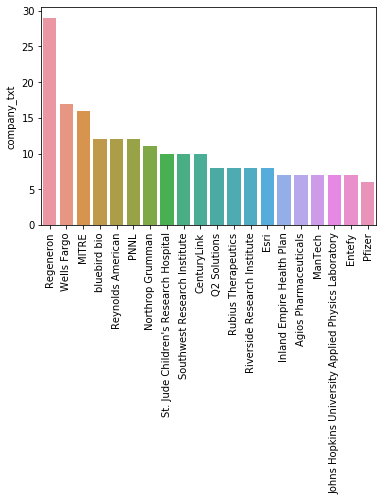

In [30]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

# Pivot Tables

In [31]:
pd.pivot_table(df, index = 'job_simp', values = 'avg_salary')

,avg_salary
job_simp,
analyst,82.040541
data engineer,113.677165
data scientist,114.116803
director,132.833333
manager,114.727273
mle,129.197368
na,104.525862


In [32]:
pd.pivot_table(df, index = ['job_simp','seniority'], values = 'avg_salary')

avg_salary
job_simp       seniority            
analyst        na          72.185714
               senior      98.865854
data engineer  na         103.288462
               senior     130.214286
data scientist na         102.476821
               senior     133.016129
director       na         132.833333
manager        na         115.500000
               senior     111.250000
mle            na         118.660000
               senior     149.461538
na             na          97.133152
               senior     117.358491

In [33]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [34]:
pd.pivot_table(df, index = ['job_state','job_simp'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job_simp                  
WI        na                       3
          data scientist           4
          data engineer            2
          analyst                  8
WA        na                      10
          mle                      1
          data scientist          12
          data engineer            6
          analyst                  6
VA        manager                  1
          analyst                 10
          data scientist          44
          data engineer            8
          mle                     12
          na                      12
UT        na                       1
          data scientist           3
TX        na                      14
          mle                      1
          data scientist          11
          data engineer           10
          analyst                  2
TN        na                      10
          data scientist           1
          data engineer            1
          analyst                  3
SC        analyst                  5
          data engineer            1
RI        analyst                  3
PA        mle                      2
          data scientist           1
          analyst                  5
          na                       9
OR        analyst                  2
OK        data scientist           2
          data engineer            1
OH        na                       6
          data scientist           6
          data engineer            2
          analyst                  2
NY        manager                  2
          data scientist          15
          analyst                 12
          data engineer            9
          na                      38
          director                 3
          mle                      3
NM        data scientist           5
NJ        na                       2
          data scientist           5
          data engineer            3
          analyst                  2
NC        data scientist           2
          data engineer            6
          analyst                  2
          manager                  1
          na                      18
MT        analyst                  1
MO        na                       4
          data scientist           4
          analyst                  2
MN        data scientist           4
          data engineer            3
          analyst                  2
MI        manager                  2
          data scientist           3
MD        na                      10
          data scientist          10
          analyst                  4
MA        data engineer            2
          analyst                  4
          data scientist          24
          mle                      2
          na                      65
LA        data engineer            3
KY        na                       2
          data scientist           1
IN        na                       3
          data scientist           2
          data engineer            2
IL        na                      12
          mle                      2
          data scientist           6
          data engineer            6
          analyst                  1
ID        analyst                  1
IA        data engineer            3
          analyst                  2
          na                       1
GA        mle                      2
          data scientist           4
          na                       2
FL        na                       3
          data scientist          12
          data engineer            4
          analyst                  2
DE        na                       2
DC        na                       1
          data scientist           5
          analyst                  1
CO        manager                  1
          data scientist           9
          analyst                  1
          data engineer            3
          na                       5
          director                 2
CA        analyst             

In [35]:
pd.pivot_table(df[df.job_simp == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
UT,138.500000
DC,136.200000
NJ,126.100000
VA,125.193182
CA,122.957447
CO,122.555556
MD,121.950000
WI,115.000000
IL,114.916667


In [36]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'python', 'R', 'spark', 'aws', 'excel', 'Type of ownership','avg_salary']]

In [37]:
for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df_pivots,index =i, values = 'avg_salary').sort_values('avg_salary', ascending = False))

Rating
        avg_salary
Rating            
 4.1    131.171429
-1.0    130.200000
 3.5    118.217949
 5.0    118.083333
 4.3    117.845238
 3.9    116.427083
 4.5    115.546875
 3.0    114.309524
 2.1    113.500000
 4.6    113.117647
 4.2    111.719512
 4.0    110.513889
 4.9    107.750000
 3.3    106.634146
 3.8    106.340000
 3.7    103.872881
 3.6    102.886076
 2.5    101.000000
 4.7    100.825000
 3.2     99.628205
 2.7     99.437500
 2.6     96.428571
 3.1     96.413043
 2.8     93.250000
 2.2     90.000000
 3.4     87.177419
 2.9     84.181818
 4.8     83.357143
 4.4     79.571429
 2.4     76.357143
Industry
                                          avg_salary
Industry                                            
Fast-Food & Quick-Service Restaurants     151.000000
Internet                                  138.305556
Utilities                                 138.000000
Research & Development                    128.904762
Travel Agencies                           128.500000
Elect

ValueError: Grouper for 'avg_salary' not 1-dimensional

In [38]:
pd.pivot_table(df_pivots, index = 'Revenue', columns = 'python', values = 'avg_salary', aggfunc = 'count')

python,0,1
Revenue,,
$1 to $2 billion (USD),42.0,60.0
$1 to $5 million (USD),8.0,8.0
$10 to $25 million (USD),22.0,13.0
$10+ billion (USD),47.0,54.0
$100 to $500 million (USD),51.0,61.0
$2 to $5 billion (USD),21.0,16.0
$25 to $50 million (USD),14.0,11.0
$5 to $10 billion (USD),32.0,9.0
$5 to $10 million (USD),5.0,2.0


In [39]:
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

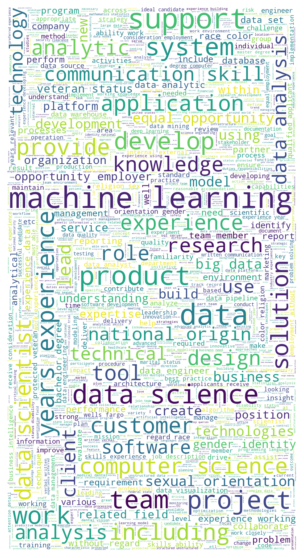

In [40]:
words = " ".join(df['Job Description'])

def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered


words_filtered = punctuation_stop(words)

text = " ".join([ele for ele in words_filtered])

wc= WordCloud(background_color="white", random_state=1,stopwords=STOPWORDS, max_words = 2000, width =800, height = 1500)
wc.generate(text)

plt.figure(figsize=[10,10])
plt.imshow(wc,interpolation="bilinear")
plt.axis('off')
plt.show()

# Save DataFrame

In [41]:
df.to_csv('data_eda.csv',index = False)